#### **Step 1: Data Loading & Exploration**

1.1 Import Required Libraries

In [17]:
# Basic libraries for data handling and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)  # Show all columns

 1.2 Load the Dataset

In [18]:
# Load dataset
df = pd.read_csv("dataset.csv")  # Change this filename to the actual path if needed

# Preview first few rows
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Dataset Overview

We are using a **real-world dataset** containing patient information such as:

- Age  
- Sex  
- Blood pressure  
- Cholesterol  
- And other relevant medical features  

The goal is to **predict whether a patient is likely to have heart disease or not** based on these attributes.

1.3 Initial Data Info and Stats

In [20]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [21]:
# Summary statistics
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


#### **Step 2: Data Cleaning & Preprocessing**

Clean unrealistic values (like 0 bp, 0 cholesterol), handle negative values in oldpeak, and encode categorical features if needed.

2.1: Handle Invalid Values (resting_bp_s, cholesterol, oldpeak)

In [23]:
# Replace 0s with NaN in medically invalid columns
df['resting_bp_s'] = df['resting_bp_s'].replace(0, np.nan)
df['cholesterol'] = df['cholesterol'].replace(0, np.nan)

# Print how many NaNs introduced
print("Missing BP:", df['resting_bp_s'].isnull().sum())
print("Missing Cholesterol:", df['cholesterol'].isnull().sum())

# Clip oldpeak to remove negative values
df['oldpeak'] = df['oldpeak'].clip(lower=0)

Missing BP: 1
Missing Cholesterol: 172


Filled missing values in specific columns using **median imputation**:

In [27]:
# Fill missing values with median
df['resting_bp_s'].fillna(df['resting_bp_s'].median(), inplace=True)
df['cholesterol'].fillna(df['cholesterol'].median(), inplace=True)
import warnings; warnings.filterwarnings('ignore')

 2.2: One-Hot Encode Nominal Columns 

 **Nominal Features to Encode:**
- `chest_pain_type`
- `resting_ecg`
- `st_slope`

In [28]:
df = pd.get_dummies(df, columns=['chest_pain_type', 'resting_ecg', 'ST_slope'], drop_first=True)

2.3: Verify Data After Cleaning

In [29]:
# Confirm shape and types
df.info()

# See if NaNs still exist
print("Any NaNs left?", df.isnull().values.any())

# Preview data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   resting_bp_s         1190 non-null   float64
 3   cholesterol          1190 non-null   float64
 4   fasting_blood_sugar  1190 non-null   int64  
 5   max_heart_rate       1190 non-null   int64  
 6   exercise_angina      1190 non-null   int64  
 7   oldpeak              1190 non-null   float64
 8   target               1190 non-null   int64  
 9   chest_pain_type_2    1190 non-null   bool   
 10  chest_pain_type_3    1190 non-null   bool   
 11  chest_pain_type_4    1190 non-null   bool   
 12  resting_ecg_1        1190 non-null   bool   
 13  resting_ecg_2        1190 non-null   bool   
 14  ST_slope_1           1190 non-null   bool   
 15  ST_slope_2           1190 non-null   b

,age,sex,resting_bp_s,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,target,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,ST_slope_1,ST_slope_2,ST_slope_3
0,40,1,140.0,289.0,0,172,0,0.0,0,True,False,False,False,False,True,False,False
1,49,0,160.0,180.0,0,156,0,1.0,1,False,True,False,False,False,False,True,False
2,37,1,130.0,283.0,0,98,0,0.0,0,True,False,False,True,False,True,False,False
3,48,0,138.0,214.0,0,108,1,1.5,1,False,False,True,False,False,False,True,False
4,54,1,150.0,195.0,0,122,0,0.0,0,False,True,False,False,False,True,False,False


#### **Step 3: Exploratory Data Analysis (EDA)**
 Objective:
Understand patterns, distributions, and relationships in the data — especially with respect to the `target` column (heart disease).

3.1: Target Distribution

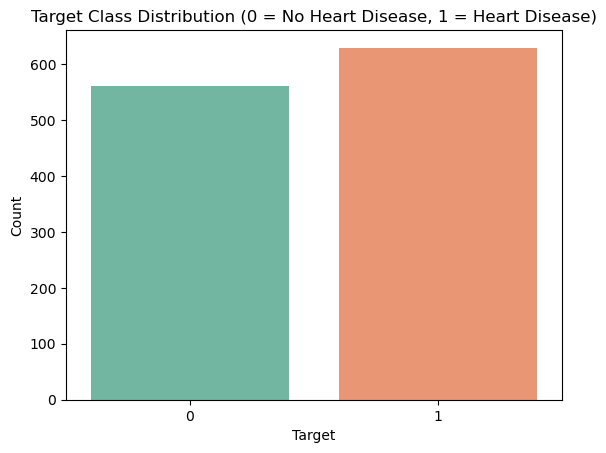

In [30]:
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Class Distribution (0 = No Heart Disease, 1 = Heart Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

The target variable has **two classes** with approximate counts of **550** and **600**.  
Since the difference is small, the dataset is **not significantly biased** — class imbalance is minimal and suitable for training standard classification models without special handling.

3.2: Correlation Matrix

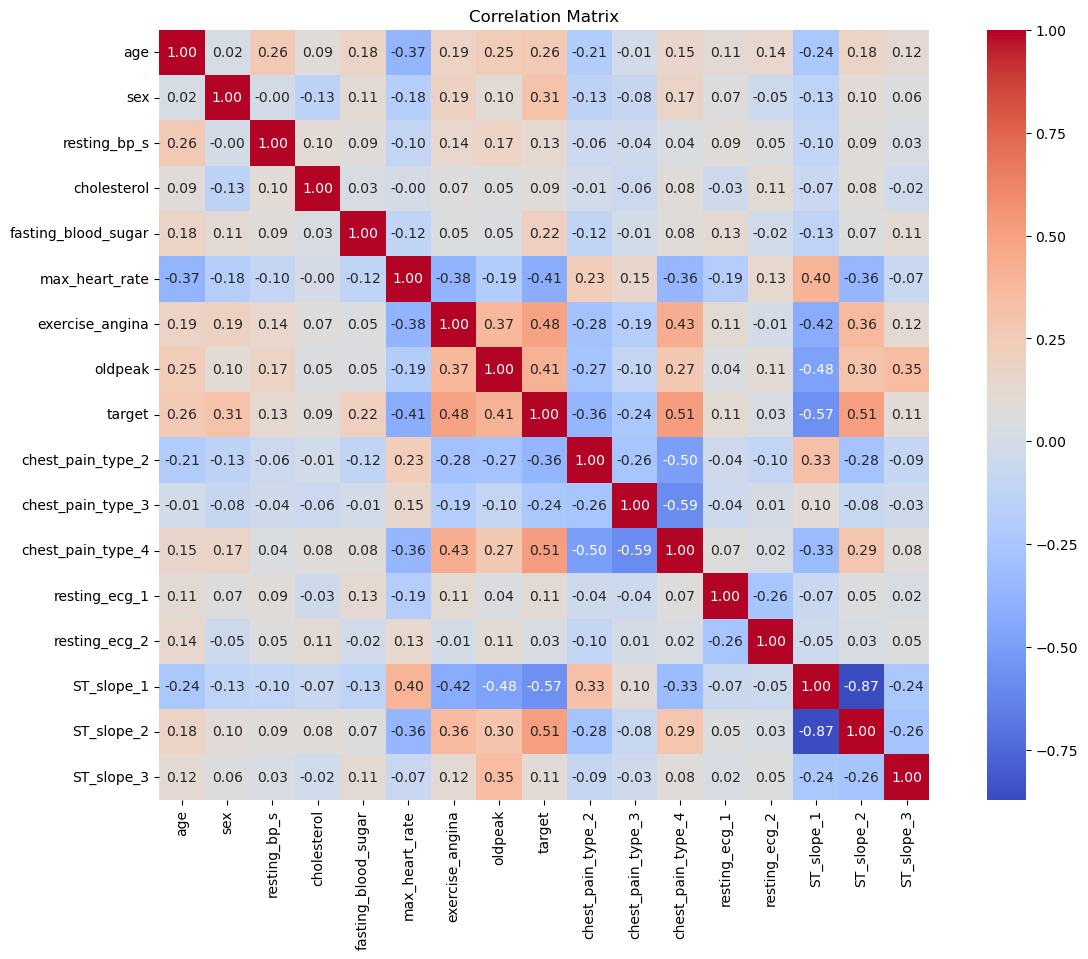

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The following variables have shown strong correlation with the likelihood of heart disease:

- `chest_pain_type = 4`  
- `ST_slope = 1`  
- `ST_slope = 2`  
- `max_heart_rate`  
- `oldpeak`  
- `exercise_angina`  
- `age` and `sex`

These features contribute significantly to the model's decision boundary and help improve its predictive accuracy.

3.3: Distribution of Numerical Features

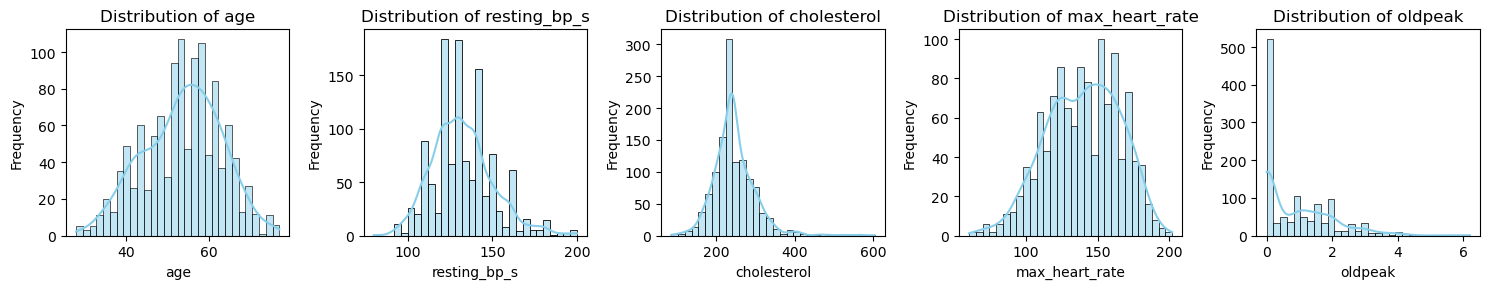

In [41]:
numerical_cols = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

plt.figure(figsize=(15, 3))  # Adjust width as needed
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

### 🔧 Feature-wise Preprocessing Summary

| Feature         | Transformation Applied        | Reason |
|----------------|-------------------------------|--------|
| oldpeak        | log(1 + x)                     | Highly right-skewed |
| cholesterol    | log(1 + x)                     | Right-skewed with outliers |
| age            | StandardScaler                 | Approximately normal |
| resting_bp_s   | StandardScaler                 | Slight right-skew |
| max_heart_rate | StandardScaler                 | Normal distribution |

These transformations help improve model accuracy and convergence during training.

Apply Scalers & Transformations

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create a copy to avoid overwriting original
df_processed = df.copy()

# 1. Log transform oldpeak (highly skewed)
df_processed['oldpeak'] = np.log1p(df_processed['oldpeak'])

# 2. Log transform cholesterol (to reduce outlier impact)
df_processed['cholesterol'] = np.log1p(df_processed['cholesterol'])

# 3. Feature list to scale using StandardScaler
standard_scale_features = ['age', 'resting_bp_s', 'max_heart_rate']

scaler = StandardScaler()
df_processed[standard_scale_features] = scaler.fit_transform(df_processed[standard_scale_features])


3.4: Boxplots (Numerical Feature vs Target)

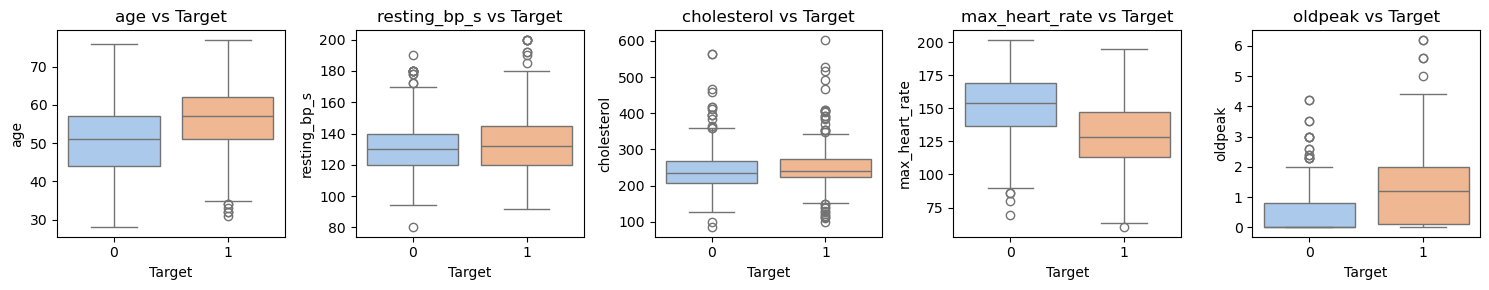

In [45]:
numerical_cols = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

plt.figure(figsize=(15, 3))  # Adjust width as needed for clarity
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(x='target', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

**Boxplot Analysis Summary**

- `age`: Patients with heart disease (`target = 1`) tend to be slightly older.
- `resting_bp_s`: Small difference between classes; not a strong discriminator.
- `cholesterol`: Wide spread in both classes with some outliers. Difference is minor.
- `max_heart_rate`: Significantly **lower** in patients with heart disease — strong inverse relationship.
- `oldpeak`: Clear difference; patients with heart disease show much **higher** values — very strong predictor.

These insights will help us focus on high-impact features for model training.


3.5: Countplots for Binary/Categorical Columns

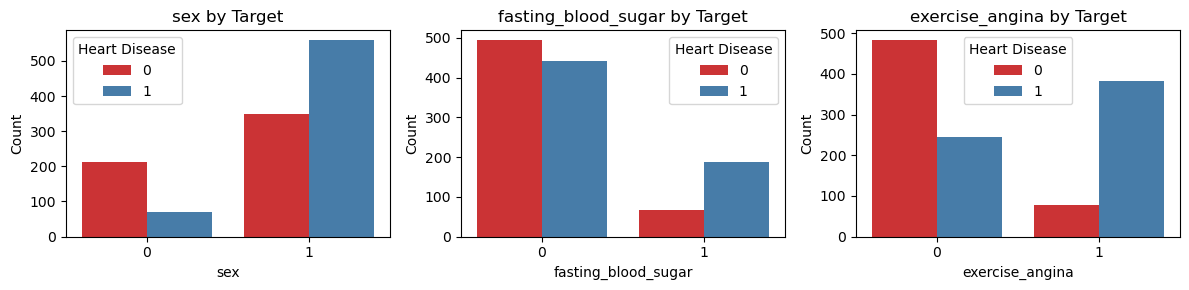

In [46]:
binary_cols = ['sex', 'fasting_blood_sugar', 'exercise_angina']

fig, axes = plt.subplots(1, len(binary_cols), figsize=(12, 3))  # One row, three columns

for i, col in enumerate(binary_cols):
    sns.countplot(x=col, hue='target', data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{col} by Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Heart Disease')

plt.tight_layout()
plt.show()

#### **Step 4: Model Preparation**

In [47]:
# Separate features and target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")

X_train shape: (952, 16)
X_test shape: (238, 16)
Train target distribution:
target
1    0.528361
0    0.471639
Name: proportion, dtype: float64
Test target distribution:
target
1    0.529412
0    0.470588
Name: proportion, dtype: float64


- We split the data into features (X) and labels (y).
- Used `train_test_split()` with `stratify=y` to preserve class balance.
- 80% data is used for training, 20% for testing.
- This prepares us for unbiased model evaluation in the next step.


#### **Step 5: Model Training and Evaluation**

5.1: Import Required Tools

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

5.2: Define & Train Models

In [51]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_lr = lr_model.predict(X_test)
print(" Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       112
           1       0.84      0.87      0.86       126

    accuracy                           0.84       238
   macro avg       0.85      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Confusion Matrix:
 [[ 91  21]
 [ 16 110]]


In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_rf = rf_model.predict(X_test)
print(" Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

 Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       112
           1       0.96      0.90      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

Confusion Matrix:
 [[107   5]
 [ 12 114]]



 Random Forest outperformed Logistic Regression across all metrics and is selected as the **best-performing model** so far.

---

**Next Step:**
We will now proceed to:
- **Hyperparameter Tuning** to further improve Random Forest (Step 6B)



#### **Step 6: Hyperparameter Tuning** 

6.1: Random Forest Hyperparameter Tuning

Find the best combination of hyperparameters to improve accuracy, generalization, and avoid overfitting.

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

6.2: Run GridSearchCV on Random Forest

In [55]:
rf = RandomForestClassifier(random_state=42)

# 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model & params
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


6.3: Evaluate Tuned Model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict using tuned model
y_pred_best = best_rf.predict(X_test)

# Evaluation
print("Tuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Tuned Random Forest Results:
Accuracy: 0.9328

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       112
           1       0.95      0.92      0.94       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238

Confusion Matrix:
[[106   6]
 [ 10 116]]


 **Final Tuned Model Evaluation**

| Metric        | Before Tuning | After Tuning (Best Model) |
|---------------|---------------|----------------------------|
| Accuracy      | 0.93          | 0.9328                     |
| F1-Score (Class 1) | 0.93     | 0.94                       |
| Recall (Class 1)   | 0.90     | 0.92                       |
| Precision (Class 1)| 0.96     | 0.95                       |

- The tuned model shows **better recall and F1-score**, especially for patients with heart disease.
- Final Confusion Matrix:



 **Conclusion**: The **tuned Random Forest model is locked as final** and will be used for feature importance and saving.


#### **Step 7: Feature Importance Visualization**

7.1: Extract Feature Importances

In [60]:
# Get feature importances
importances = best_rf.feature_importances_
features = X.columns

# Convert to DataFrame
importance_df = pd.DataFrame({'Feature': features,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display top 10
importance_df.head(10)


,Feature,Importance
13,ST_slope_1,0.133596
5,max_heart_rate,0.112449
7,oldpeak,0.109295
10,chest_pain_type_4,0.108571
0,age,0.091858
2,resting_bp_s,0.085876
3,cholesterol,0.084206
14,ST_slope_2,0.066786
6,exercise_angina,0.065689
1,sex,0.043686


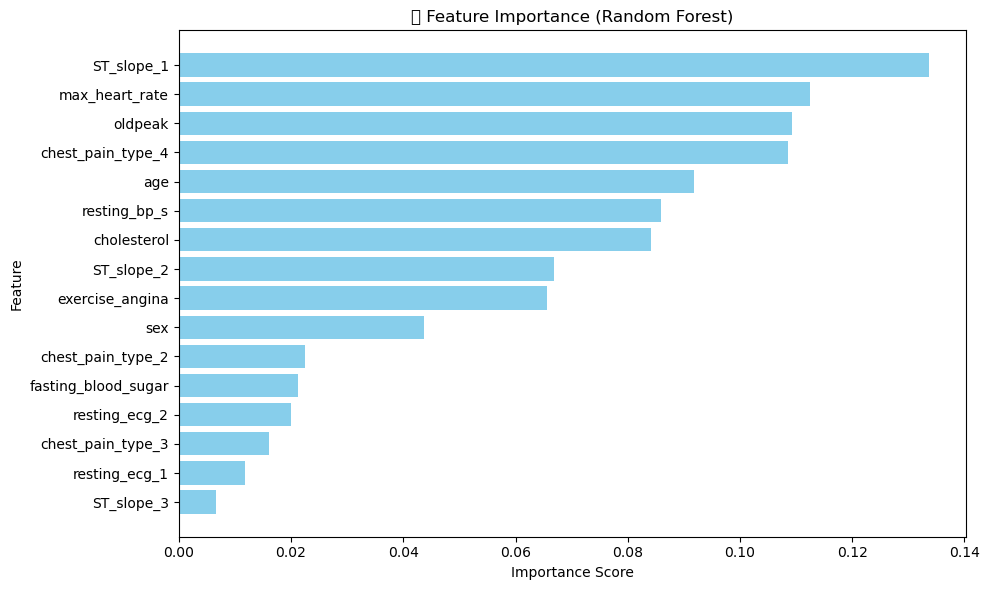

In [61]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance on top
plt.title('🔍 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Random Forest automatically ranks features based on how much they contribute to the final predictions.

Below are the top 10 features ranked by importance:

| Feature              | Importance Score |
|----------------------|------------------|
| ST_slope_1           | 0.1336           |
| max_heart_rate       | 0.1124           |
| oldpeak              | 0.1093           |
| chest_pain_type_4    | 0.1086           |
| age                  | 0.0919           |
| resting_bp_s         | 0.0859           |
| cholesterol          | 0.0842           |
| ST_slope_2           | 0.0668           |
| exercise_angina      | 0.0657           |
| sex                  | 0.0437           |

**Interpretation:**
- **ST_slope_1**, **max_heart_rate**, and **oldpeak** are the **most important predictors** of heart disease in this dataset.
- These features strongly influence the model's decisions, and should be prioritized for clinical attention.
- Even **chest_pain_type_4** and **age** show high predictive value.

- This analysis improves transparency of the model and adds trustworthiness in real-world medical applications.
